In [2]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install openpyxl

In [10]:
df_road_4HR_HM_R = df_road_4HR2014[(df_road_4HR2014['Ri_van'] == 'R') & (df_road_4HR2014['Ri_naar'] == 'R') ]
mean_score_R_OS_AL = df_road_4HR_HM_R['OS_AL'].mean()
mean_score_R_AS_AL = df_road_4HR_HM_R['AS_AL'].mean()
print(f"mean_score_R_OS_AL: {mean_score_R_OS_AL}")
print(f"mean_score_R_AS_AL: {mean_score_R_AS_AL}")

df_road_4HR_HM_R

mean_score_R_OS_AL: 5052.7307692307695
mean_score_R_AS_AL: 6367.076923076923


,Baannr,Wegnr_van,Ri_van,Hec_letter_van,Hm_van,Baantype_van,Traject_van,Wegnr_naar,Ri_naar,Hec_letter_naar,...,OS_AL,OS_L1,OS_L2,OS_L3,OS_vrachtperc,AS_AL,AS_L1,AS_L2,AS_L3,AS_vrachtperc
391,737002,4,R,NaN,249988,HR,RYKSWG,4,R,NaN,...,2378,1733,164,481,27,1871,1401,92,378,25
393,738001,4,R,NaN,241597,HR,Zeelandweg,4,R,NaN,...,4707,3659,399,649,22,4392,3730,196,466,15
396,738004,4,R,NaN,242942,HR,KP MARKIEZAAT,4,R,NaN,...,1816,1282,140,394,29,1237,890,69,278,28
406,738014,4,R,NaN,244292,HR,RYKSWG,4,R,NaN,...,2378,1733,164,481,27,1871,1401,92,378,25
417,739005,4,R,NaN,119155,HR,Halsterseweg,4,R,NaN,...,1585,1427,61,97,10,1470,1345,46,79,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,1148081,4,R,NaN,3397,HR,Rijksweg A4,4,R,NaN,...,8480,7939,313,228,6,10317,9633,424,260,7
2324,1148085,4,R,NaN,5003,HR,Rijksweg A4,4,R,NaN,...,12203,11560,379,264,5,14049,13323,455,271,5
2328,1148089,4,R,NaN,6269,HR,Rijksweg A4,4,R,NaN,...,8858,8242,359,257,7,12251,11542,445,264,6
2329,1148090,4,R,NaN,9072,HR,Rijksweg A4,4,R,NaN,...,9827,9081,428,318,8,14359,13629,457,273,5


In [54]:
df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R') ]
mean_score_R_OS_AL = df_road_4HR_HM_R['OS_AL'].mean()
mean_score_R_AS_AL = df_road_4HR_HM_R['AS_AL'].mean()
print(f"mean_score_R_OS_AL: {mean_score_R_OS_AL}")
print(f"mean_score_R_AS_AL: {mean_score_R_AS_AL}")

df_road_4HR_HM_R




mean_score_R_OS_AL: 7842.490909090909
mean_score_R_AS_AL: 8778.454545454546


,VIAS-baannr,Wegnr_van,Ri_van,Hec_letter_van,Hm_van,Baantype_van,Traject_van,Wegnr_naar,Ri_naar,Hec_letter_naar,...,OS_L2,OS_L3,OS_vrachtperc,AS_AL,AS_L1,AS_L2,AS_L3,AS_vrachtperc,etmaal_AL_vorig_jaar,etmaal_AL_verschil
651,1730,4,R,NaN,54374.0,HR,Den Haag-Zuid,4,R,NaN,...,501,246,10,6820,6111,446,264,10,44270,4930
654,1733,4,R,NaN,52701.0,HR,Den Haag-Zuid,4,R,NaN,...,372,189,11,5251,4669,361,221,11,33126,3374
669,1784,4,R,NaN,55576.0,HR,Den Hoorn,4,R,NaN,...,434,272,11,5600,5080,336,185,9,38552,4148
670,1786,4,R,NaN,55149.0,HR,Den Hoorn,4,R,NaN,...,303,190,9,4947,4546,244,157,8,34667,3933
675,1793,4,R,NaN,51846.0,HR,Rijswijk,4,R,NaN,...,688,358,12,9945,8935,624,386,10,64386,4114
676,1794,4,R,NaN,50987.0,HR,Rijswijk,4,R,NaN,...,657,373,13,9065,8180,510,376,10,58389,2811
685,1834,4,R,NaN,50246.0,HR,Kntr Plaspoelpolder,4,R,NaN,...,624,439,10,12012,11115,454,444,7,78959,2641
695,1873,4,R,NaN,49718.0,HR,Kp Ypenburg,4,R,NaN,...,621,370,10,10227,9270,523,435,9,68472,2328
736,1955,4,R,NaN,48793.0,HR,Kp Ypenburg,4,R,NaN,...,605,367,12,8713,7787,503,424,11,59851,2049
740,1960,4,R,NaN,48340.0,HR,Rijswijk-Centrum,4,R,NaN,...,621,373,9,10320,9376,527,418,9,68683,2317


In [6]:
data_2015 = 'datasets_spitsuren_wegvakken/definitief_INWEVA_2015_spits.xlsx'
df2015 = pd.read_excel(data_2015)
df2015

,Baannr,Wegnr_van,Ri_van,Hec_letter_van,Hm_van,Baantype_van,Traject_van,Wegnr_naar,Ri_naar,Hec_letter_naar,...,OS_AL,OS_L1,OS_L2,OS_L3,OS_vrachtperc,AS_AL,AS_L1,AS_L2,AS_L3,AS_vrachtperc
0,338011,58,R,NaN,166038,HR,RYKSWG,58,R,NaN,...,2129,1931,145,53,9,2510,2405,83,22,4
1,338012,58,R,a,167134,PST,MIDDELBURG 39,58,R,a,...,1324,1171,97,56,12,1313,1239,51,23,6
2,338013,58,R,NaN,166764,HR,RYKSWG,58,R,NaN,...,3279,2959,221,99,10,3636,3464,127,45,5
3,338014,58,R,b,167291,OPR,MIDDELBURG 39,58,R,b,...,647,600,35,12,7,1045,995,43,7,5
4,338015,58,R,NaN,167134,HR,RYKSWG,58,R,NaN,...,1842,1670,132,40,9,2205,2103,83,19,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7755,6002555,N421,R,NaN,2737,HR,HOUTEN-OOST 18A,N421,R,NaN,...,530,485,34,11,8,159,144,13,2,9
7756,6002556,15,R,NaN,51667,HR,RYKSWG,15,R,NaN,...,6589,5851,241,497,11,8087,7714,140,233,5
7757,6002557,15,R,NaN,53950,HR,RYKSWG,15,R,NaN,...,6864,6063,279,522,12,9057,8558,190,309,6
7758,6002558,15,R,b,53845,OPR,HEIJPLAAT 18,15,R,NaN,...,472,217,95,160,54,695,469,79,147,33


In [7]:
df_road_4HR_2015 = df2015[(df2015['Wegnr_van'] == 4) & (df2015["Wegnr_naar"] == 4) & (df2015['Baantype_naar'] == 'HR') & (df2015['Baantype_van'] == 'HR')] 
df_road_4HR_HM_2015 = df_road_4HR_2015[(df_road_4HR_2015['Hm_van'] <= 150000) & (df_road_4HR_2015['Hm_naar'] <= 150000)]
df_road_4HR_HM_2015

,Baannr,Wegnr_van,Ri_van,Hec_letter_van,Hm_van,Baantype_van,Traject_van,Wegnr_naar,Ri_naar,Hec_letter_naar,...,OS_AL,OS_L1,OS_L2,OS_L3,OS_vrachtperc,AS_AL,AS_L1,AS_L2,AS_L3,AS_vrachtperc
533,840028,4,L,NaN,103204,HR,RYKSWG,4,L,NaN,...,4123,3563,222,338,14,3687,3102,198,387,16
534,840029,4,R,NaN,103173,HR,RYKSWG,4,R,NaN,...,1557,1190,108,259,24,2756,2390,119,247,13
546,841004,4,R,NaN,92250,HR,RYKSWG,4,R,NaN,...,2442,1887,191,364,23,5711,5132,238,341,10
548,841006,4,L,NaN,93396,HR,RYKSWG,4,L,NaN,...,4973,4476,187,310,10,3267,2675,190,402,18
549,841007,4,R,NaN,93330,HR,RYKSWG,4,R,NaN,...,3097,2458,239,400,21,6404,5749,288,367,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,1148087,4,L,NaN,6128,HR,Rijksweg A4,4,L,NaN,...,14449,13782,353,314,5,11907,11446,269,192,4
2119,1148089,4,R,NaN,6269,HR,Rijksweg A4,4,R,NaN,...,9050,8589,332,129,5,12031,11378,439,214,5
2120,1148090,4,R,NaN,9072,HR,Rijksweg A4,4,R,NaN,...,9920,9284,432,204,6,14258,13540,480,238,5
2174,1148147,4,L,NaN,952,HR,Nieuwe Haagseweg,4,L,NaN,...,10623,10216,202,205,4,8168,7855,160,153,4


In [9]:
df_road_4HR_HM_R_2015 = df_road_4HR_HM_2015[(df_road_4HR_HM_2015['Ri_van'] == 'R') & (df_road_4HR_HM_2015['Ri_naar'] == 'R') ]
mean_score_R_OS_AL2015 = df_road_4HR_HM_R_2015['OS_AL'].mean()
mean_score_R_AS_AL2015 = df_road_4HR_HM_R_2015['AS_AL'].mean()
print(f"mean_score_R_OS_AL2015: {mean_score_R_OS_AL2015}")
print(f"mean_score_R_AS_AL2015: {mean_score_R_AS_AL2015}")

df_road_4HR_HM_R_2015

mean_score_R_OS_AL2015: 7126.833333333333
mean_score_R_AS_AL2015: 9209.770833333334


,Baannr,Wegnr_van,Ri_van,Hec_letter_van,Hm_van,Baantype_van,Traject_van,Wegnr_naar,Ri_naar,Hec_letter_naar,...,OS_AL,OS_L1,OS_L2,OS_L3,OS_vrachtperc,AS_AL,AS_L1,AS_L2,AS_L3,AS_vrachtperc
534,840029,4,R,NaN,103173,HR,RYKSWG,4,R,NaN,...,1557,1190,108,259,24,2756,2390,119,247,13
546,841004,4,R,NaN,92250,HR,RYKSWG,4,R,NaN,...,2442,1887,191,364,23,5711,5132,238,341,10
549,841007,4,R,NaN,93330,HR,RYKSWG,4,R,NaN,...,3097,2458,239,400,21,6404,5749,288,367,10
557,841015,4,R,NaN,101255,HR,RYKSWG,4,R,NaN,...,2713,2166,181,366,20,4665,4067,246,352,13
560,841018,4,R,NaN,101605,HR,RYKSWG,4,R,NaN,...,2887,2325,181,381,19,4911,4308,240,363,12
563,841021,4,R,NaN,97825,HR,RYKSWG,4,R,NaN,...,2336,1849,157,330,21,4398,3906,182,310,11
564,841022,4,R,NaN,99468,HR,RYKSWG,4,R,NaN,...,2918,2340,197,381,20,4992,4365,271,356,13
596,843055,4,R,NaN,71310,HR,RYKSWG,4,R,NaN,...,5114,5114,0,0,0,5429,5429,0,0,0
597,843056,4,R,NaN,75292,HR,BENELUXWG,4,R,NaN,...,5359,4901,203,255,9,6499,6086,171,242,6
656,843123,4,R,NaN,70575,HR,RYKSWG,4,R,NaN,...,9983,9035,516,432,9,10667,10056,295,316,6


In [2]:
import pandas as pd

# List of file paths for the datasets for each year (2012 to 2019)
data_files = {
    2012: 'datasets_spitsuren_wegvakken/INWEVA_2012_spits.xlsx',
    2013: 'datasets_spitsuren_wegvakken/INWEVA_2013_spits.xlsx',
    2014: 'datasets_spitsuren_wegvakken/INWEVA_2014_spits.xlsx',
    2015: 'datasets_spitsuren_wegvakken/INWEVA_2015_spits.xlsx',
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
    2020: 'datasets_spitsuren_wegvakken/INWEVA_2020_spits.xlsx',
    2021: 'datasets_spitsuren_wegvakken/INWEVA_2021_spits.xlsx',
    2022: 'datasets_spitsuren_wegvakken/INWEVA_2022_spits.xlsx',
    2023: 'datasets_spitsuren_wegvakken/INWEVA_2023_spits.xlsx',
}

# Initialize an empty list to store results
results = []

# Loop through the datasets
for year, file in data_files.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute)
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    
    # Further filter for Hectometer <= 150,000
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    
    # Separate data for 'R' (right) direction
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush)
    mean_score_R_OS_R = df_road_4HR_HM_R['OS_AL'].mean()
    mean_score_R_AS_R = df_road_4HR_HM_R['AS_AL'].mean()

    mean_score_R_OS_L = df_road_4HR_HM_L['OS_AL'].mean()
    mean_score_R_AS_L = df_road_4HR_HM_L['AS_AL'].mean()
    
     # Store the results for the right side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'R',   # Right-hand side
        'Mean Score': mean_score_R_OS_R
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'R',      # Right-hand side
        'Mean Score': mean_score_R_AS_R
    })
    
    # Store the results for the left side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'L',   # Left-hand side
        'Mean Score': mean_score_R_OS_L
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'L',      # Left-hand side
        'Mean Score': mean_score_R_AS_L
    })

# Convert the results into a DataFrame
df_results = pd.DataFrame(results)

# Export the results to an Excel file
df_results.to_excel('mean_scores_road4_HR_R_2012_2019.xlsx', index=False)

display(df_results)




/opt/anaconda3/envs/TIL6022/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Year,Rush,Direction,Mean Score
0,2012,Morning,R,4865.486111
1,2012,Afternoon,R,6232.222222
2,2012,Morning,L,5928.235294
3,2012,Afternoon,L,4930.235294
4,2013,Morning,R,5558.046154
5,2013,Afternoon,R,7013.169231
6,2013,Morning,L,6880.406780
7,2013,Afternoon,L,5692.966102
8,2014,Morning,R,5520.048387
9,2014,Afternoon,R,7181.580645


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('mean_scores_road4_HR_R_2012_2019.xlsx')

# Pivot the data for easier plotting
# This will create separate columns for each combination of Rush and Direction
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the four lines for Morning and Afternoon, L and R directions
plt.plot(pivot_df.index, pivot_df[('Morning', 'R')], label='Morning Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Morning', 'L')], label='Morning Rush L', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'R')], label='Afternoon Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'L')], label='Afternoon Rush L', marker='o')

# Add titles and labels
plt.title('Mean Scores for Morning and Afternoon Rush (L and R)')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()








FileNotFoundError: [Errno 2] No such file or directory: 'mean_scores_road4_HR_R_2012_2019.xlsx'

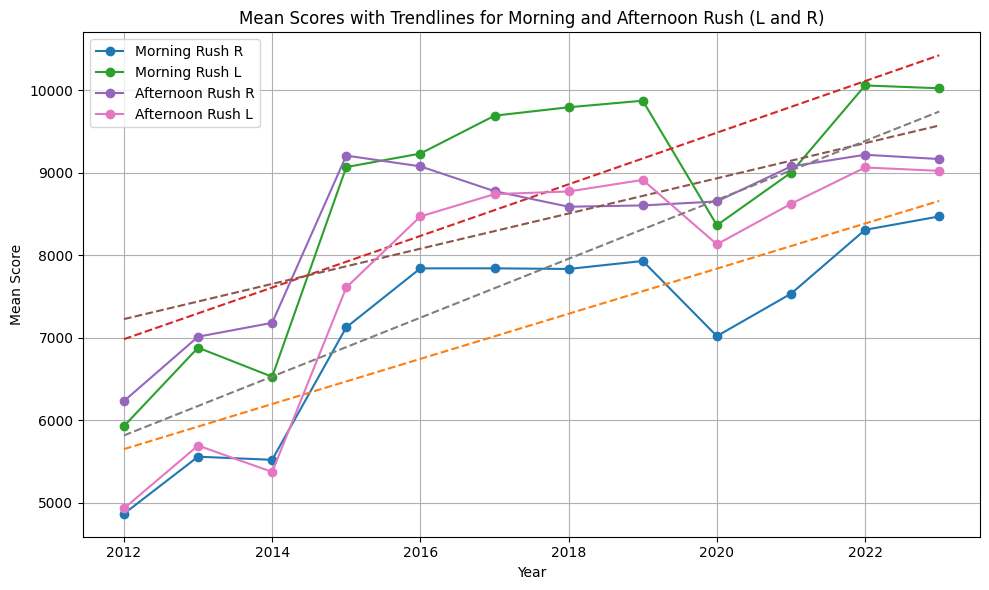

Predicted Morning Rush R mean score for 2023: 8660.05
Predicted Morning Rush L mean score for 2023: 10426.76
Predicted Afternoon Rush R mean score for 2023: 9574.68
Predicted Afternoon Rush L mean score for 2023: 9744.14


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
df = pd.read_excel('mean_scores_road4_HR_R_2012_2019.xlsx')

# Pivot the data for easier plotting and trendline calculation
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Set up the years and the mean scores for Morning and Afternoon rush L and R
years = pivot_df.index.values

# We'll store predicted values for each combination in a dictionary
predicted_2023 = {}

# Function to fit a trendline and predict 2023 value for each column
def fit_and_predict_trendline(mean_scores, label):
    # Fit a linear trendline using numpy's polyfit
    coefficients = np.polyfit(years, mean_scores, 1)  # 1st-degree polynomial (linear fit)
    
    # Predict the mean score for 2023
    year_2023 = 2023
    predicted_value = np.polyval(coefficients, year_2023)
    predicted_2023[label] = predicted_value
    
    # Return the trendline (predicted values for all years)
    trendline = np.polyval(coefficients, years)
    return trendline

# Plot the original data and trendlines
plt.figure(figsize=(10, 6))

for rush, direction in [('Morning', 'R'), ('Morning', 'L'), ('Afternoon', 'R'), ('Afternoon', 'L')]:
    label = f"{rush} Rush {direction}"
    
    # Get the mean scores for the current rush and direction
    mean_scores = pivot_df[(rush, direction)]
    
    # Plot the original data
    plt.plot(years, mean_scores, label=label, marker='o')
    
    # Plot the trendline
    trendline = fit_and_predict_trendline(mean_scores, label)
    plt.plot(years, trendline, linestyle='--')

# Add titles and labels
plt.title('Mean Scores with Trendlines for Morning and Afternoon Rush (L and R)')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the predicted values for 2023
for label, prediction in predicted_2023.items():
    print(f"Predicted {label} mean score for 2023: {prediction:.2f}")



In [62]:
data_files = {
    2012: 'datasets_spitsuren_wegvakken/INWEVA_2012_spits.xlsx',
    2013: 'datasets_spitsuren_wegvakken/INWEVA_2013_spits.xlsx',
    2014: 'datasets_spitsuren_wegvakken/INWEVA_2014_spits.xlsx',
    2015: 'datasets_spitsuren_wegvakken/INWEVA_2015_spits.xlsx',
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
    2020: 'datasets_spitsuren_wegvakken/INWEVA_2020_spits.xlsx',
    2021: 'datasets_spitsuren_wegvakken/INWEVA_2021_spits.xlsx',
    2022: 'datasets_spitsuren_wegvakken/INWEVA_2022_spits.xlsx',
    2023: 'datasets_spitsuren_wegvakken/INWEVA_2023_spits.xlsx',
}

# Initialize an empty list to store results
results = []

# Loop through the datasets
for year, file in data_files.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute)
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    
    # Further filter for Hectometer <= 150,000
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    
    # Separate data for 'R' (right) direction
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush)
    mean_score_R_OS_R = df_road_4HR_HM_R['OS_L1'].mean()
    mean_score_R_AS_R = df_road_4HR_HM_R['AS_L1'].mean()

    mean_score_R_OS_L = df_road_4HR_HM_L['OS_L1'].mean()
    mean_score_R_AS_L = df_road_4HR_HM_L['AS_L1'].mean()
    
     # Store the results for the right side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'R',   # Right-hand side
        'Mean Score': mean_score_R_OS_R
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'R',      # Right-hand side
        'Mean Score': mean_score_R_AS_R
    })
    
    # Store the results for the left side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'L',   # Left-hand side
        'Mean Score': mean_score_R_OS_L
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'L',      # Left-hand side
        'Mean Score': mean_score_R_AS_L
    })

# Convert the results into a DataFrame
df_results = pd.DataFrame(results)

# Export the results to an Excel file
df_results.to_excel('PEOPLEmean_scores_road4_HR_R_2012_2019.xlsx', index=False)

display(df_results)



/opt/anaconda3/envs/TIL6022/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Year,Rush,Direction,Mean Score
0,2012,Morning,R,4405.902778
1,2012,Afternoon,R,5824.763889
2,2012,Morning,L,5480.044118
3,2012,Afternoon,L,4541.897059
4,2013,Morning,R,4943.446154
5,2013,Afternoon,R,6473.738462
6,2013,Morning,L,6334.644068
7,2013,Afternoon,L,5218.033898
8,2014,Morning,R,4956.596774
9,2014,Afternoon,R,6622.983871


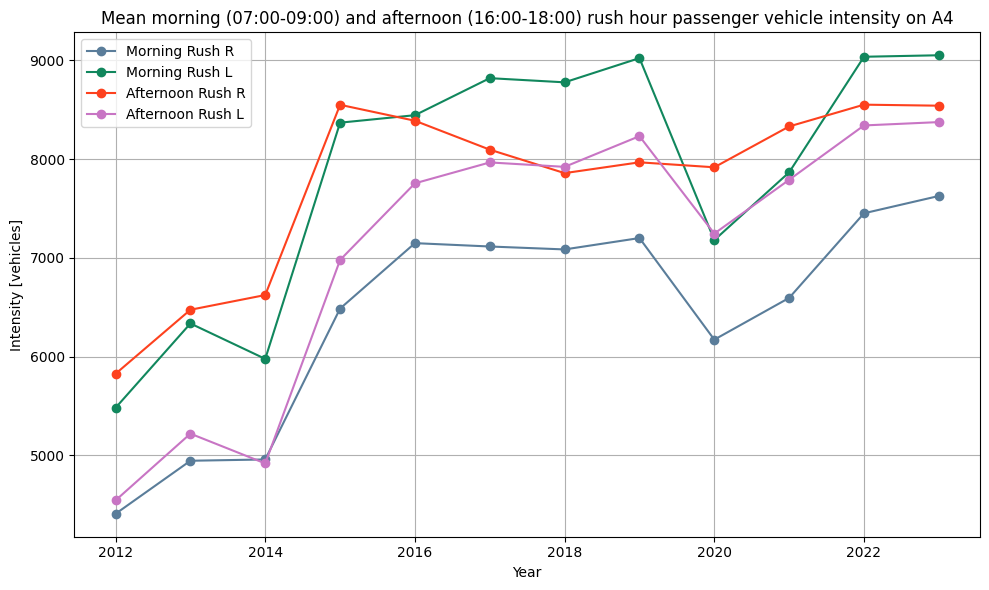

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('PEOPLEmean_scores_road4_HR_R_2012_2019.xlsx')

# Pivot the data for easier plotting
# This will create separate columns for each combination of Rush and Direction
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the four lines for Morning and Afternoon, L and R directions
plt.plot(pivot_df.index, pivot_df[('Morning', 'R')], color="xkcd:steel blue", label='Morning Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Morning', 'L')], color='xkcd:dark sea green', label='Morning Rush L', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'R')], color='xkcd:orange red', label='Afternoon Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'L')], color='xkcd:orchid', label='Afternoon Rush L', marker='o')

# Add titles and labels
plt.title('Mean morning (07:00-09:00) and afternoon (16:00-18:00) rush hour passenger vehicle intensity on A4')
plt.xlabel('Year')
plt.ylabel('Intensity [vehicles]')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()



In [3]:
data_files = {
    2012: 'datasets_spitsuren_wegvakken/INWEVA_2012_spits.xlsx',
    2013: 'datasets_spitsuren_wegvakken/INWEVA_2013_spits.xlsx',
    2014: 'datasets_spitsuren_wegvakken/INWEVA_2014_spits.xlsx',
    2015: 'datasets_spitsuren_wegvakken/INWEVA_2015_spits.xlsx',
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
    2020: 'datasets_spitsuren_wegvakken/INWEVA_2020_spits.xlsx',
    2021: 'datasets_spitsuren_wegvakken/INWEVA_2021_spits.xlsx',
    2022: 'datasets_spitsuren_wegvakken/INWEVA_2022_spits.xlsx',
    2023: 'datasets_spitsuren_wegvakken/INWEVA_2023_spits.xlsx',
}

# Initialize an empty list to store results
results = []

# Loop through the datasets
for year, file in data_files.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute)
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    
    # Further filter for Hectometer <= 150,000
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    
    # Separate data for 'R' (right) direction
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush)
    mean_score_R_OS_R = (df_road_4HR_HM_R['OS_AL']*(df_road_4HR_HM_R['OS_vrachtperc']/100)).mean()
    mean_score_R_AS_R = (df_road_4HR_HM_R['AS_AL']*(df_road_4HR_HM_R['AS_vrachtperc']/100)).mean()

    mean_score_R_OS_L = (df_road_4HR_HM_L['OS_AL']*(df_road_4HR_HM_L['OS_vrachtperc']/100)).mean()
    mean_score_R_AS_L = (df_road_4HR_HM_L['AS_AL']*(df_road_4HR_HM_L['AS_vrachtperc']/100)).mean()
    
     # Store the results for the right side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'R',   # Right-hand side
        'Mean Score': mean_score_R_OS_R
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'R',      # Right-hand side
        'Mean Score': mean_score_R_AS_R
    })
    
    # Store the results for the left side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'L',   # Left-hand side
        'Mean Score': mean_score_R_OS_L
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'L',      # Left-hand side
        'Mean Score': mean_score_R_AS_L
    })

# Convert the results into a DataFrame
df_results = pd.DataFrame(results)

# Export the results to an Excel file
df_results.to_excel('FREIGHTmean_scores_road4_HR_R_2012_2019.xlsx', index=False)

display(df_results)


/opt/anaconda3/envs/TIL6022/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Year,Rush,Direction,Mean Score
0,2012,Morning,R,454.719444
1,2012,Afternoon,R,405.603333
2,2012,Morning,L,447.642647
3,2012,Afternoon,L,389.734118
4,2013,Morning,R,614.654308
5,2013,Afternoon,R,534.798308
6,2013,Morning,L,543.099153
7,2013,Afternoon,L,478.370169
8,2014,Morning,R,563.149677
9,2014,Afternoon,R,556.033871


In [5]:
extra_table = df_results[df_results['Year'].isin([2018, 2019, 2020])]

display(extra_table)

,Year,Rush,Direction,Mean Score
24,2018,Morning,R,748.407778
25,2018,Afternoon,R,734.871481
26,2018,Morning,L,1021.835600
27,2018,Afternoon,L,848.408000
28,2019,Morning,R,735.934074
29,2019,Afternoon,R,629.888704
30,2019,Morning,L,852.326800
31,2019,Afternoon,L,687.423800
32,2020,Morning,R,847.319783
33,2020,Afternoon,R,735.153043


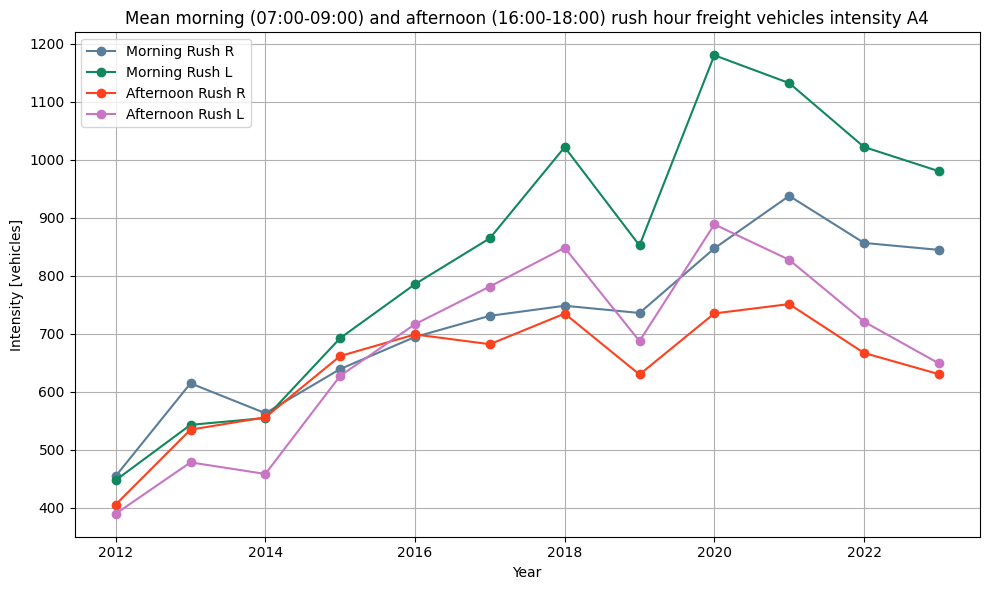

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('FREIGHTmean_scores_road4_HR_R_2012_2019.xlsx')

# Pivot the data for easier plotting
# This will create separate columns for each combination of Rush and Direction
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the four lines for Morning and Afternoon, L and R directions
plt.plot(pivot_df.index, pivot_df[('Morning', 'R')], color="xkcd:steel blue", label='Morning Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Morning', 'L')], color='xkcd:dark sea green', label='Morning Rush L', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'R')], color='xkcd:orange red', label='Afternoon Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'L')], color='xkcd:orchid', label='Afternoon Rush L', marker='o')


# Add titles and labels
plt.title('Mean morning (07:00-09:00) and afternoon (16:00-18:00) rush hour freight vehicles intensity A4')
plt.xlabel('Year')
plt.ylabel('Intensity [vehicles]')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
# Loop through the datasets
for year, file in data_files.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute)
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    print(f"Year: {year}, Original Rows: {len(df)}, Filtered Rows: {len(df_road_4HR)}")
    
    # Further filter for Hectometer <= 150,000
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    print(f"Year: {year}, Final Rows (HM): {len(df_road_4HR_HM)}")
    
    # Separate data for 'R' (right) direction
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush)
    mean_score_R_OS_R = (df_road_4HR_HM_R['OS_AL'] * (df_road_4HR_HM_R['OS_vrachtperc'] / 100)).mean()
    mean_score_R_AS_R = (df_road_4HR_HM_R['AS_AL'] * (df_road_4HR_HM_R['AS_vrachtperc'] / 100)).mean()
    mean_score_R_OS_L = (df_road_4HR_HM_L['OS_AL'] * (df_road_4HR_HM_L['OS_vrachtperc'] / 100)).mean()
    mean_score_R_AS_L = (df_road_4HR_HM_L['AS_AL'] * (df_road_4HR_HM_L['AS_vrachtperc'] / 100)).mean()

    # Log the calculated mean scores
    print(f"Year: {year}, Mean Score R Morning: {mean_score_R_OS_R}, Mean Score R Afternoon: {mean_score_R_AS_R}")

    # Store the results...


Year: 2012, Original Rows: 7572, Filtered Rows: 163
Year: 2012, Final Rows (HM): 140
Year: 2012, Mean Score R Morning: 454.7194444444445, Mean Score R Afternoon: 405.60333333333335


/opt/anaconda3/envs/TIL6022/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Year: 2013, Original Rows: 7567, Filtered Rows: 155
Year: 2013, Final Rows (HM): 124
Year: 2013, Mean Score R Morning: 614.6543076923077, Mean Score R Afternoon: 534.7983076923078
Year: 2014, Original Rows: 7860, Filtered Rows: 163
Year: 2014, Final Rows (HM): 130
Year: 2014, Mean Score R Morning: 563.1496774193549, Mean Score R Afternoon: 556.0338709677419
Year: 2015, Original Rows: 7760, Filtered Rows: 129
Year: 2015, Final Rows (HM): 90
Year: 2015, Mean Score R Morning: 639.3212500000001, Mean Score R Afternoon: 661.7331250000001
Year: 2016, Original Rows: 8659, Filtered Rows: 135
Year: 2016, Final Rows (HM): 96
Year: 2016, Mean Score R Morning: 694.5938000000001, Mean Score R Afternoon: 698.9284
Year: 2017, Original Rows: 8683, Filtered Rows: 145
Year: 2017, Final Rows (HM): 105
Year: 2017, Mean Score R Morning: 731.0389090909092, Mean Score R Afternoon: 682.1149090909091
Year: 2018, Original Rows: 8715, Filtered Rows: 144
Year: 2018, Final Rows (HM): 104
Year: 2018, Mean Score R M

In [67]:
import pandas as pd

# List of file paths for the datasets for each year (2012 to 2019)
data_files = {
    #2012: 'datasets_spitsuren_wegvakken/INWEVA_2012_spits.xlsx',
    #2013: 'datasets_spitsuren_wegvakken/INWEVA_2013_spits.xlsx',
    #2014: 'datasets_spitsuren_wegvakken/INWEVA_2014_spits.xlsx',
    2015: 'datasets_spitsuren_wegvakken/INWEVA_2015_spits.xlsx',
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
    #2020: 'datasets_spitsuren_wegvakken/INWEVA_2020_spits.xlsx',
    #2021: 'datasets_spitsuren_wegvakken/INWEVA_2021_spits.xlsx',
    #2022: 'datasets_spitsuren_wegvakken/INWEVA_2022_spits.xlsx',
    #2023: 'datasets_spitsuren_wegvakken/INWEVA_2023_spits.xlsx',
}

# Initialize an empty list to store results
results = []

# Loop through the datasets
for year, file in data_files.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute)
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    
    # Further filter for Hectometer <= 150,000
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    
    # Separate data for 'R' (right) direction
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush)
    mean_score_R_OS_R = df_road_4HR_HM_R['OS_AL'].mean()
    mean_score_R_AS_R = df_road_4HR_HM_R['AS_AL'].mean()

    mean_score_R_OS_L = df_road_4HR_HM_L['OS_AL'].mean()
    mean_score_R_AS_L = df_road_4HR_HM_L['AS_AL'].mean()
    
     # Store the results for the right side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'R',   # Right-hand side
        'Mean Score': mean_score_R_OS_R
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'R',      # Right-hand side
        'Mean Score': mean_score_R_AS_R
    })
    
    # Store the results for the left side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'L',   # Left-hand side
        'Mean Score': mean_score_R_OS_L
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'L',      # Left-hand side
        'Mean Score': mean_score_R_AS_L
    })

# Convert the results into a DataFrame
df_results = pd.DataFrame(results)

# Export the results to an Excel file
df_results.to_excel('mean_scores_road4_HR_R_2015_2019.xlsx', index=False)

display(df_results)

,Year,Rush,Direction,Mean Score
0,2015,Morning,R,7126.833333
1,2015,Afternoon,R,9209.770833
2,2015,Morning,L,9070.404762
3,2015,Afternoon,L,7610.547619
4,2016,Morning,R,7842.240000
5,2016,Afternoon,R,9079.440000
6,2016,Morning,L,9234.543478
7,2016,Afternoon,L,8471.913043
8,2017,Morning,R,7842.490909
9,2017,Afternoon,R,8778.454545


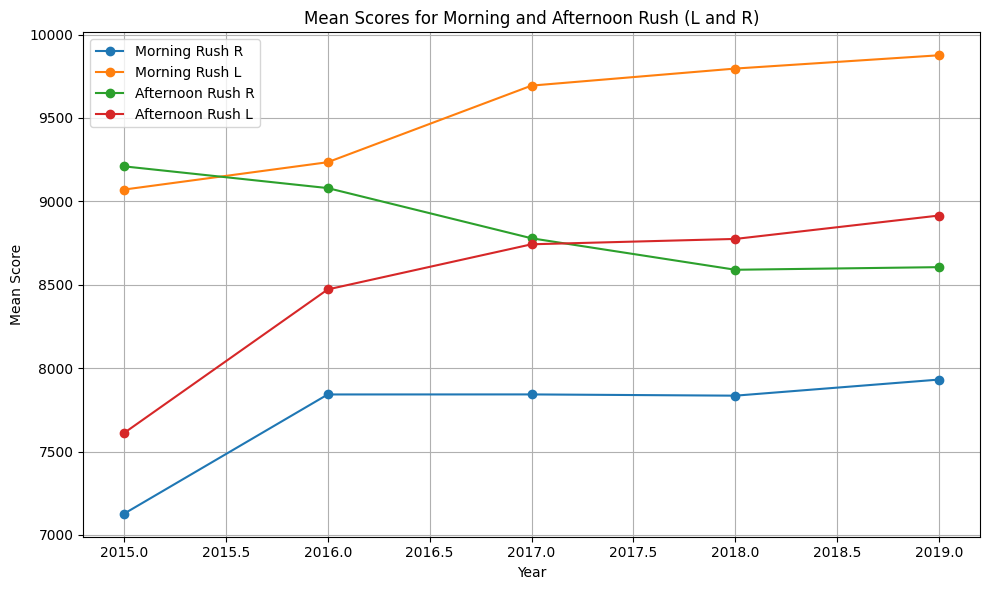

In [69]:
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('mean_scores_road4_HR_R_2015_2019.xlsx')

# Pivot the data for easier plotting
# This will create separate columns for each combination of Rush and Direction
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the four lines for Morning and Afternoon, L and R directions
plt.plot(pivot_df.index, pivot_df[('Morning', 'R')], label='Morning Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Morning', 'L')], label='Morning Rush L', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'R')], label='Afternoon Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'L')], label='Afternoon Rush L', marker='o')

# Add titles and labels
plt.title('Mean Scores for Morning and Afternoon Rush (L and R)')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

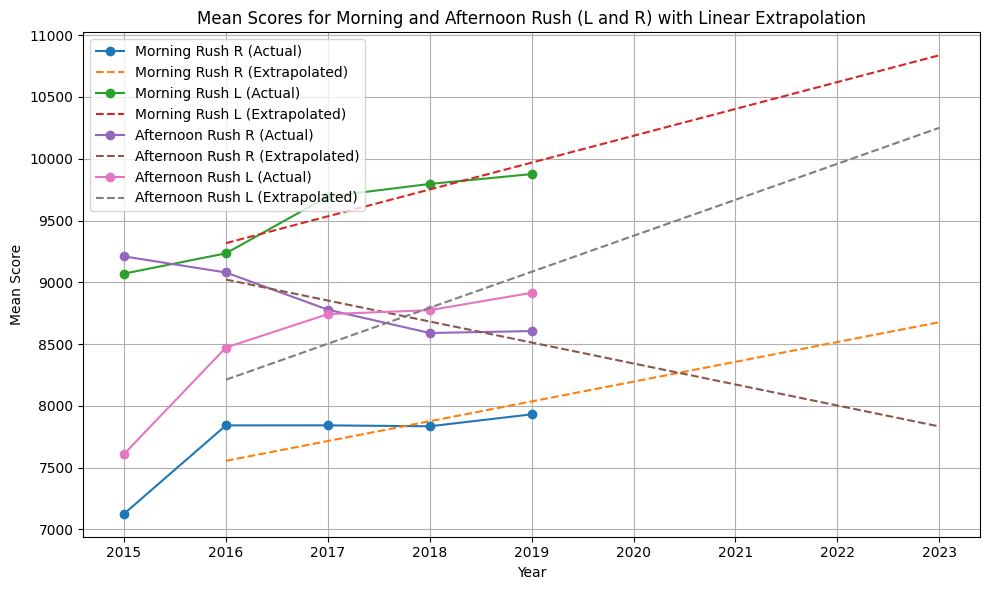

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('mean_scores_road4_HR_R_2015_2019.xlsx')

# Pivot the data for easier plotting
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Define the years you have data for
years = pivot_df.index.values

# Define the years you want to extrapolate to (e.g., 2020, 2021, 2022)
years_extended = np.arange(2016, 2024)  # 2015 to 2022

# Create a function for linear extrapolation
def linear_extrapolate(years, values):
    # Fit a linear trendline to the data
    slope, intercept = np.polyfit(years, values, 1)
    # Predict values for the extended years
    extrapolated_values = slope * years_extended + intercept
    return extrapolated_values

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the original data and the extrapolated lines
for rush, direction in [('Morning', 'R'), ('Morning', 'L'), ('Afternoon', 'R'), ('Afternoon', 'L')]:
    # Extract the actual mean score for the current rush and direction
    actual_values = pivot_df[(rush, direction)].values
    
    # Perform the linear extrapolation
    extrapolated_values = linear_extrapolate(years, actual_values)
    
    # Plot the actual data
    plt.plot(years, actual_values, label=f'{rush} Rush {direction} (Actual)', marker='o')
    
    # Plot the extrapolated data
    plt.plot(years_extended, extrapolated_values, label=f'{rush} Rush {direction} (Extrapolated)', linestyle='--')

# Add titles and labels
plt.title('Mean Scores for Morning and Afternoon Rush (L and R) with Linear Extrapolation')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


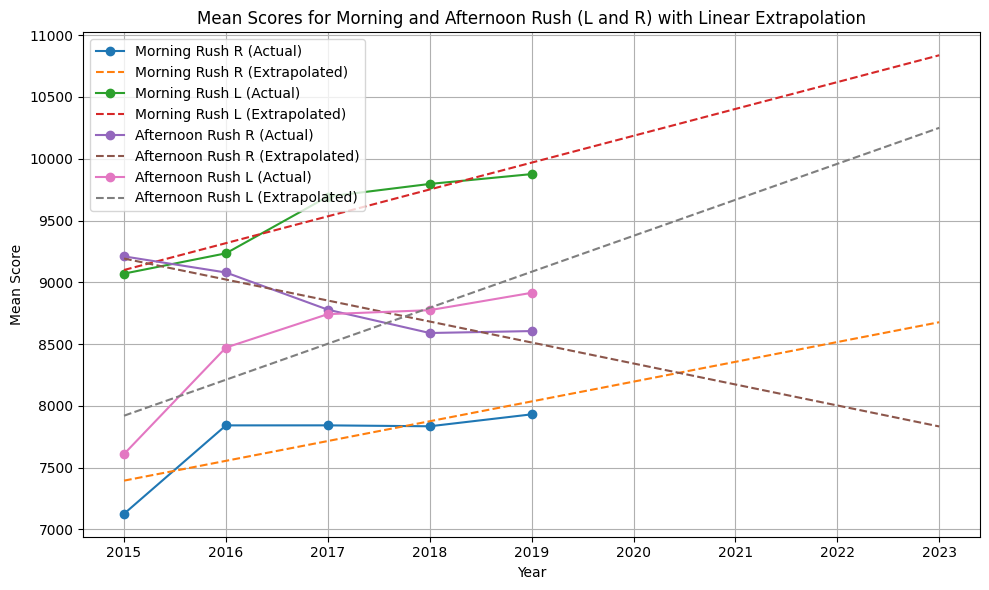

In [73]:
df = pd.read_excel('mean_scores_road4_HR_R_2015_2019.xlsx')

# Pivot the data for easier plotting
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Define the years you have data for
years = pivot_df.index.values

# Define the years you want to extrapolate to (e.g., 2020, 2021, 2022)
years_extended = np.arange(2015, 2024)  # 2015 to 2022

# Create a function for linear extrapolation
def linear_extrapolate(years, values):
    # Fit a linear trendline to the data
    slope, intercept = np.polyfit(years, values, 1)
    # Predict values for the extended years
    extrapolated_values = slope * years_extended + intercept
    return extrapolated_values

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the original data and the extrapolated lines
for rush, direction in [('Morning', 'R'), ('Morning', 'L'), ('Afternoon', 'R'), ('Afternoon', 'L')]:
    # Extract the actual mean score for the current rush and direction
    actual_values = pivot_df[(rush, direction)].values
    
    # Perform the linear extrapolation
    extrapolated_values = linear_extrapolate(years, actual_values)
    
    # Plot the actual data
    plt.plot(years, actual_values, label=f'{rush} Rush {direction} (Actual)', marker='o')
    
    # Plot the extrapolated data
    plt.plot(years_extended, extrapolated_values, label=f'{rush} Rush {direction} (Extrapolated)', linestyle='--')

# Add titles and labels
plt.title('Mean Scores for Morning and Afternoon Rush (L and R) with Linear Extrapolation')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()